In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image

# Define the GlassClassifier model
class GlassClassifier(nn.Module):
    def __init__(self):
        super(GlassClassifier, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 16, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Linear(16 * 8 * 8, 1)  # Output a single value (anomaly score)

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

base_dir = '/content/drive/MyDrive/Colab Notebooks/archive/cable'

# Load train and test data
train_dataset = ImageFolder(os.path.join(base_dir, 'train'), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = ImageFolder(os.path.join(base_dir, 'test'), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Define anomaly detection threshold
anomaly_threshold = 0.488  # Adjust as needed

# Train the model
model = GlassClassifier()
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        targets = (labels != 0).float().unsqueeze(1)  # 1 if anomaly, 0 if good
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")
"""

Epoch [1/3], Loss: 0.4339
Epoch [2/3], Loss: 0.0384
Epoch [3/3], Loss: 0.0002


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os

# New Code for testing
class GlassClassifier(nn.Module):
    def __init__(self):
        super(GlassClassifier, self).__init__()
        # Increasing the depth of the encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, stride=1, padding=1),  # More filters in conv layers
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),  # Adding an extra conv layer
            nn.ReLU(True),
            nn.MaxPool2d(2, 2)
        )
        # Adjusting the fully connected layer to match the new flattened size
        self.fc = nn.Linear(128 * 16 * 16, 1)  # Adjusted for output size after new encoder

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc(x)
        return x

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load train and test data
base_dir = '/content/drive/MyDrive/Colab Notebooks/archive/screw'
train_dataset = ImageFolder(os.path.join(base_dir, 'train'), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = ImageFolder(os.path.join(base_dir, 'test'), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Define anomaly detection threshold (This should be decided based on validation set)
anomaly_threshold = 0.5

# Initialize the model, loss function, and optimizer
model = GlassClassifier().cuda()  # Using .cuda() to ensure the model is on GPU
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with additional logging for accuracy
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    for images, labels in train_loader:
        images, labels = images.cuda(), labels.cuda()  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(images)
        targets = (labels != 0).float().unsqueeze(1)  # 1 if anomaly, 0 if good
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

        # Calculate training accuracy within the epoch
        predictions = torch.sigmoid(outputs) > anomaly_threshold
        correct_predictions += (predictions == targets).sum().item()
        total_predictions += targets.size(0)

    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = (correct_predictions / total_predictions) * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# ... rest of your existing code for testing ...


Epoch [1/3], Loss: 0.1029, Accuracy: 100.00%
Epoch [2/3], Loss: 0.0000, Accuracy: 100.00%
Epoch [3/3], Loss: 0.0000, Accuracy: 100.00%


In [ ]:
# New code for testing:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move your model to the GPU if available

# Ensure the model is in evaluation mode
model.eval()

# Initialize counters for correct predictions and total predictions
correct_predictions = 0
total_predictions = 0

# Loop over the test data
for images, labels in test_loader:
    # Move the images and labels to the same device as the model (GPU if available)
    images = images.to(device)
    labels = labels.to(device)

    with torch.no_grad():  # No gradients needed since we're not training
        # Forward pass through the model to get outputs
        outputs = model(images)

        # Apply sigmoid activation function to convert outputs to probabilities
        predicted_probabilities = torch.sigmoid(outputs)

        # Binarize the predictions based on the anomaly threshold
        predictions = (predicted_probabilities > anomaly_threshold).float()

        # Compare predictions with the true labels
        correct_predictions += (predictions == labels.unsqueeze(1)).sum().item()
        total_predictions += labels.size(0)

# Calculate the anomaly detection accuracy
anomaly_accuracy = (correct_predictions / total_predictions) * 100
print(f"Anomaly detection accuracy: {anomaly_accuracy:.2f}%")


Anomaly detection accuracy: 25.62%


In [ ]:
"""
# Test the model on the test data
model.eval()
correct_predictions = 0
total_predictions = 0

for images, labels in test_loader:
    with torch.no_grad():
        reconstruction = model(images)
        loss = nn.MSELoss(reduction='mean')(reconstruction, images)

    # Check if the image is from the "good" folder (no anomalies)
    print(loss.item())
    if 'good' in test_loader.dataset.classes[labels[0]]:
        # Anomaly detection should predict no anomalies (loss <= anomaly_threshold)
        if loss.item() <= anomaly_threshold:
            correct_predictions += 1
    else:
        # Anomaly detection should predict anomalies (loss > anomaly_threshold)
        if loss.item() > anomaly_threshold:
            correct_predictions += 1

    total_predictions += 1

anomaly_accuracy = (correct_predictions / total_predictions) * 100
print(f"Anomaly detection accuracy: {anomaly_accuracy:.2f}%")

"""

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 3, 128, 128])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


137.38734436035156
127.3220443725586
133.60107421875
135.64065551757812
131.29754638671875
123.39461517333984
123.36766815185547
126.0856704711914
139.7003173828125
126.78360748291016
135.11004638671875
127.34524536132812
132.0143280029297
136.46839904785156
134.0070343017578
131.27955627441406
128.59461975097656
138.6040496826172
136.3590850830078
132.2299346923828
138.3220672607422
134.2008514404297
129.68838500976562
126.84835815429688
126.35547637939453
117.99758911132812
126.02719116210938
135.28988647460938
133.46730041503906
126.24727630615234
130.5579833984375
139.1758575439453
113.05560302734375
140.23782348632812
139.8592071533203
157.92665100097656
139.05001831054688
129.4501190185547
137.48890686035156
126.15718841552734
135.50584411621094
137.74822998046875
133.06358337402344
135.18812561035156
138.3804931640625
132.41046142578125
136.90846252441406
138.7053680419922
126.62127685546875
135.46705627441406
138.71810913085938
141.09629821777344
127.8272476196289
137.325012207

In [ ]:
import os
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define a function to preprocess the image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    return image

# Define a function to make predictions
def predict_image(model, image_path, anomaly_threshold=0.5):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Set model to evaluation mode and disable dropout
    model.eval()

    # Get the prediction from the model
    with torch.no_grad():
        outputs = model(image)
        scores = torch.sigmoid(outputs)  # Convert logits to probabilities
        predicted_label = 1 if scores > anomaly_threshold else 0

    # Map predicted label to human-readable format
    label_mapping = {0: "Good", 1: "Broken"}

    return label_mapping[predicted_label]

# Example usage:
model = GlassClassifier()  # Assuming you have already trained the model
image_path = '/content/drive/MyDrive/Colab Notebooks/archive/zipper/test/good/000.png'
prediction = predict_image(model, image_path)
#print("Prediction:", prediction)


# Directory containing images
good_folder = '/content/drive/MyDrive/Colab Notebooks/archive/screw/test/thread_top'

# List all image files in the folder
image_files = os.listdir(good_folder)

# Iterate through each image file
for image_file in image_files:
    # Construct full path to the image
    image_path = os.path.join(good_folder, image_file)

    # Make prediction for the current image
    prediction = predict_image(model, image_path)

    # Print prediction
    print(f"Image: {image_file}, Prediction: {prediction}")



Image: 018.png, Prediction: Good
Image: 001.png, Prediction: Good
Image: 008.png, Prediction: Good
Image: 011.png, Prediction: Broken
Image: 021.png, Prediction: Good
Image: 005.png, Prediction: Good
Image: 016.png, Prediction: Good
Image: 014.png, Prediction: Good
Image: 015.png, Prediction: Good
Image: 006.png, Prediction: Broken
Image: 019.png, Prediction: Good
Image: 007.png, Prediction: Good
Image: 000.png, Prediction: Good
Image: 012.png, Prediction: Good
Image: 010.png, Prediction: Good
Image: 009.png, Prediction: Good
Image: 017.png, Prediction: Broken
Image: 020.png, Prediction: Broken
Image: 003.png, Prediction: Good
Image: 004.png, Prediction: Good
Image: 022.png, Prediction: Good
Image: 002.png, Prediction: Broken
Image: 013.png, Prediction: Good


**F1 SCORE - PRECISION & RECALL - ROC**

Unique labels: [0 1 2 3 4 5]
Sample model outputs: [0.49736482 0.49918392 0.498954   0.49869937 0.49905598 0.49785343
 0.49806157 0.49946663 0.49768203 0.49777737]
F1 Score: 0.1754385964912281
Precision: 0.15151515151515152
Recall: 0.20833333333333334
Actual anomalies: 24
Predicted anomalies: 33


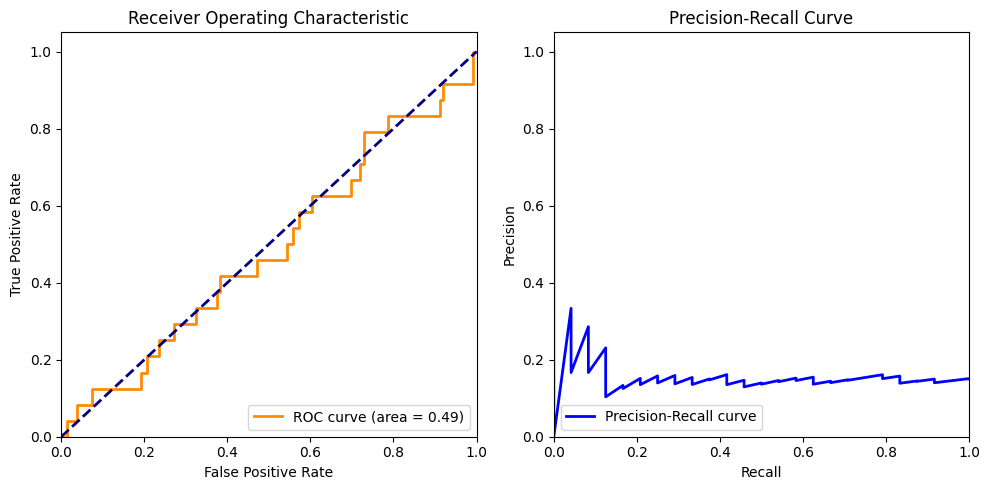

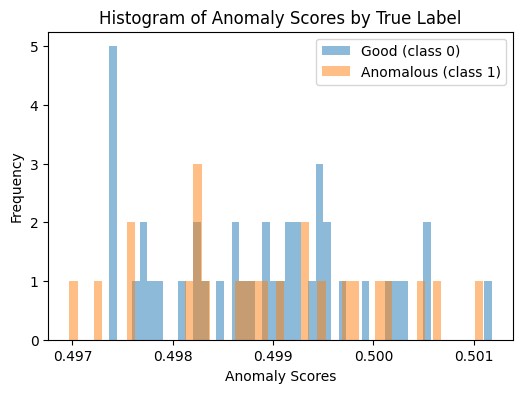

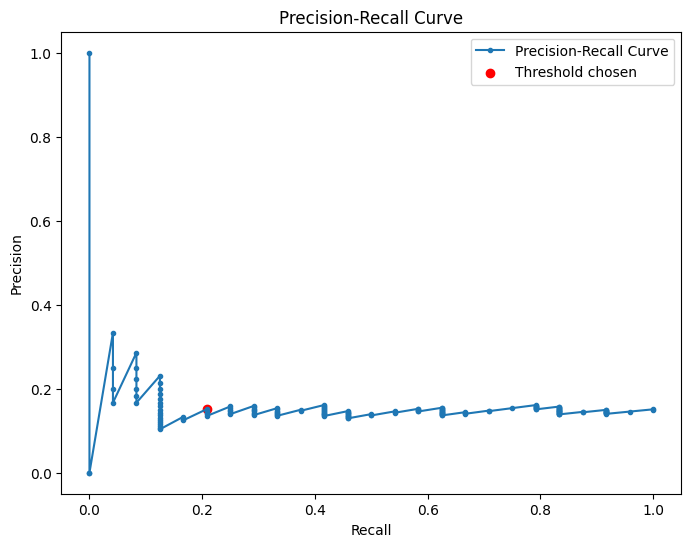

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Lists to store model outputs and actual labels
model_outputs = []
true_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    with torch.no_grad():
        outputs = model(images)
        probabilities = torch.sigmoid(outputs)
    model_outputs.extend(probabilities.cpu().numpy())
    true_labels.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
model_outputs = np.array(model_outputs).flatten()
true_labels = np.array(true_labels).flatten()

print("Unique labels:", np.unique(true_labels))
print("Sample model outputs:", model_outputs[:10])

# Assuming class 1 is the anomaly and the rest are normal
binary_true_labels = (true_labels == 1).astype(int)

# Now you can calculate the ROC curve with the binary labels
fpr, tpr, thresholds = roc_curve(binary_true_labels, model_outputs)
roc_auc = auc(fpr, tpr)

# Assuming class 1 is the anomaly and the rest are normal
binary_true_labels = (true_labels == 1).astype(int)

# Now you can calculate the precision-recall curve with the binary labels
precision, recall, thresholds_pr = precision_recall_curve(binary_true_labels, model_outputs)

# Calculate F1 score
binary_predictions = (model_outputs > anomaly_threshold).astype(int)

# Now you can also calculate F1 score with the binary labels
f1 = f1_score(binary_true_labels, (model_outputs > anomaly_threshold).astype(int))
precision_val = precision_score(binary_true_labels, (model_outputs > anomaly_threshold).astype(int))
recall_val = recall_score(binary_true_labels, (model_outputs > anomaly_threshold).astype(int))


print(f"F1 Score: {f1}")
print(f"Precision: {precision_val}")
print(f"Recall: {recall_val}")

import numpy as np

# Assuming your anomaly_threshold is already defined
anomalies = binary_true_labels.sum()
predicted_anomalies = (model_outputs > anomaly_threshold).sum()

print(f"Actual anomalies: {anomalies}")
print(f"Predicted anomalies: {predicted_anomalies}")

# If the predicted anomalies are 0, it would be useful to see the distribution of the scores
if predicted_anomalies == 0:
    print("Model outputs:", model_outputs)


# Plotting ROC Curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plotting Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Histogram of the scores
plt.figure(figsize=(6, 4))
plt.hist(model_outputs[true_labels == 0], bins=50, alpha=0.5, label='Good (class 0)')
plt.hist(model_outputs[true_labels == 1], bins=50, alpha=0.5, label='Anomalous (class 1)')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Anomaly Scores by True Label')
plt.show()


# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.scatter(recall_val, precision_val, color='red', label='Threshold chosen')  # Mark the point of the chosen threshold
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



In [ ]:
"""

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image

# Define the GlassAutoencoder model
class GlassAutoencoder(nn.Module):
    def __init__(self):
        super(GlassAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),  # input is 3 x 128 x 128, output is 32 x 64 x 64
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),  # output is 32 x 32 x 32
            nn.Conv2d(32, 16, 3, stride=2, padding=1),  # output is 16 x 16 x 16
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),  # output is 16 x 8 x 8
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 32, kernel_size=4, stride=2, padding=1),  # output is 32 x 16 x 16
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # add dropout
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),  # output is 3 x 32 x 32
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(3, 3, kernel_size=4, stride=2, padding=1),  # output is 3 x 64 x 64
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(3, 3, kernel_size=4, stride=2, padding=1),  # output is 3 x 128 x 128
            nn.Sigmoid()  # to obtain pixel values between 0 and 1
        )


    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

base_dir = '/content/drive/MyDrive/Colab Notebooks/archive/zipper'

# Load train and test data
train_dataset = ImageFolder(os.path.join(base_dir, 'train'), transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = ImageFolder(os.path.join(base_dir, 'test'), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Define anomaly detection threshold
anomaly_threshold = 0.5  # Adjust as needed

# Train the model
model = GlassAutoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, _ in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

"""

Epoch [1/15], Loss: 0.8685
Epoch [2/15], Loss: 0.8583
Epoch [3/15], Loss: 0.8063
Epoch [4/15], Loss: 0.6415
Epoch [5/15], Loss: 0.5066
Epoch [6/15], Loss: 0.4416
Epoch [7/15], Loss: 0.4065
Epoch [8/15], Loss: 0.3907
Epoch [9/15], Loss: 0.3766
Epoch [10/15], Loss: 0.3637
Epoch [11/15], Loss: 0.3505
Epoch [12/15], Loss: 0.3386
Epoch [13/15], Loss: 0.3287
Epoch [14/15], Loss: 0.3210
Epoch [15/15], Loss: 0.3148


In [ ]:
"""
# Test the model on the test data
model.eval()
correct_predictions = 0
total_predictions = 0

for images, labels in test_loader:
    with torch.no_grad():
        reconstruction = model(images)
        loss = nn.MSELoss(reduction='mean')(reconstruction, images)

    # Check if the image is from the "good" folder (no anomalies)
    print(loss.item())
    if 'good' in test_loader.dataset.classes[labels[0]]:
        # Anomaly detection should predict no anomalies (loss <= anomaly_threshold)
        if loss.item() <= anomaly_threshold:
            correct_predictions += 1
    else:
        # Anomaly detection should predict anomalies (loss > anomaly_threshold)
        if loss.item() > anomaly_threshold:
            correct_predictions += 1

    total_predictions += 1

anomaly_accuracy = (correct_predictions / total_predictions) * 100
print(f"Anomaly detection accuracy: {anomaly_accuracy:.2f}%")
"""

0.29541119933128357
0.3034842312335968
0.30715611577033997
0.3202723562717438
0.32645827531814575
0.31220707297325134
0.31586042046546936
0.2932111322879791
0.322589635848999
0.3149297535419464
0.30430200695991516
0.292583703994751
0.2994979918003082
0.3258228600025177
0.3036472499370575
0.3231307864189148
0.3303472101688385
0.31353095173835754
0.3116491734981537
0.3188551366329193
0.2944624125957489
0.3153362572193146
0.32318535447120667
0.3108992278575897
0.32203567028045654
0.3068736493587494
0.30711624026298523
0.29943227767944336
0.3284664750099182
0.331027090549469
0.3387890160083771
0.3188718259334564
0.30599141120910645
0.2932656705379486
0.30323824286460876
0.298884779214859
0.29251065850257874
0.3090449273586273
0.30271637439727783
0.3077274560928345
0.3269154131412506
0.308081716299057
0.2954683005809784
0.30799490213394165
0.297872930765152
0.31426167488098145
0.30494198203086853
0.3256688117980957
0.33039459586143494
0.3183355927467346
0.3199215233325958
0.3198763132095337

In [ ]:
"""
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image

# Define the GlassClassifier model
class GlassClassifier(nn.Module):
    def __init__(self):
        super(GlassClassifier, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),  # input is 3 x 128 x 128, output is 32 x 64 x 64
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),  # output is 32 x 32 x 32
            nn.Conv2d(32, 16, 3, stride=2, padding=1),  # output is 16 x 16 x 16
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),  # output is 16 x 8 x 8
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(16 * 8 * 8, 128),  # input size from encoder output
            nn.ReLU(True),
            nn.Linear(128, 1),  # output is a single value representing the probability of being broken
            nn.Sigmoid()  # to obtain probabilities between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)  # flatten the output for the classifier
        x = self.classifier(x)
        return x

base_dir = '/content/drive/MyDrive/Colab Notebooks/archive/zipper'

# Load dataset and define transformations
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load training dataset
train_dataset = datasets.ImageFolder(os.path.join(base_dir, 'train'), transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Load testing dataset
test_dataset = datasets.ImageFolder(os.path.join(base_dir, 'test'), transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GlassClassifier().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluate the model
model.eval()
for category, loader in test_loader.items():
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predicted = (outputs >= 0.5).float()  # convert probabilities to binary predictions
            total += labels.size(0)
            correct += (predicted == labels.unsqueeze(1)).sum().item()

    accuracy = correct / total
    print(f'Accuracy on {category} data: {accuracy:.4f}')
"""

Epoch [1/5], Loss: 0.2769
Epoch [2/5], Loss: 0.0004
Epoch [3/5], Loss: 0.0000
Epoch [4/5], Loss: 0.0000
Epoch [5/5], Loss: 0.0000


AttributeError: 'DataLoader' object has no attribute 'items'

New Approach

Fold 1
Epoch [1/10], Loss: 0.1240, Accuracy: 94.53%
Epoch [2/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [3/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [4/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [7/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0000, Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Best threshold for fold 1: 0.0
Fold 2
Epoch [1/10], Loss: 0.1266, Accuracy: 90.62%
Epoch [2/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [3/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [4/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [7/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0000, Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Best threshold for fold 2: 0.0
Fold 3
Epoch [1/10], Loss: 0.1179, Accuracy: 92.58%
Epoch [2/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [3/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [4/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [7/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0000, Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Best threshold for fold 3: 0.0
Fold 4
Epoch [1/10], Loss: 0.1077, Accuracy: 93.36%
Epoch [2/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [3/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [4/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [7/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0000, Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Best threshold for fold 4: 0.0
Fold 5
Epoch [1/10], Loss: 0.1197, Accuracy: 91.41%
Epoch [2/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [3/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [4/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [7/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0000, Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


Best threshold for fold 5: 0.0
Chosen anomaly threshold: 0.0
Epoch [1/20], Loss: 0.0912, Accuracy: 0.31%
Epoch [2/20], Loss: 0.0000, Accuracy: 76.25%
Epoch [3/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [4/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [6/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [7/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [8/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [9/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [11/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [12/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [13/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [14/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [15/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [16/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [17/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [18/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [19/20], Loss: 0.0000, Accuracy: 100.00%
Epoch [20/20], Loss: 0.0000, Accuracy: 100.00%
Anomaly det

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


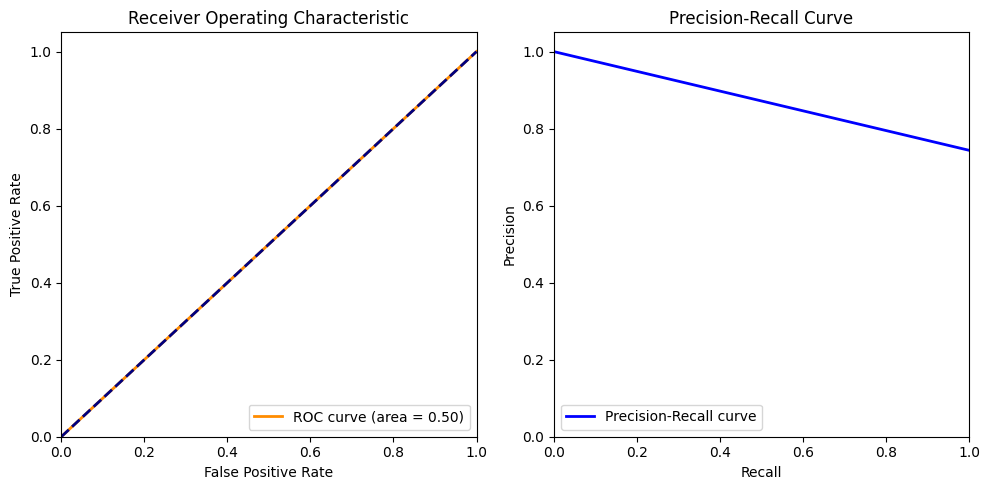

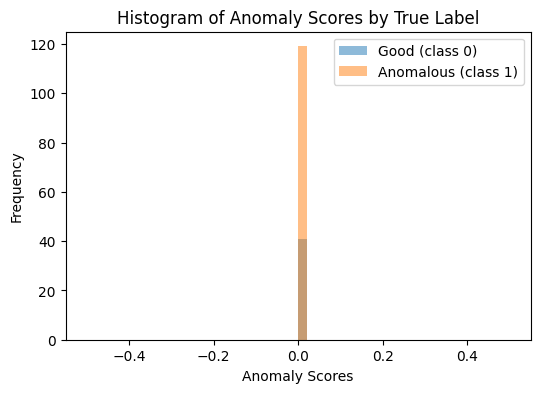

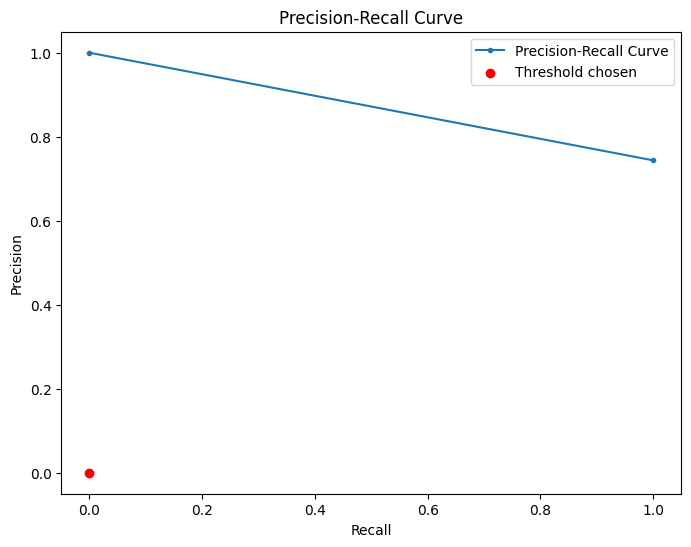

In [4]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split, Subset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import KFold

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define the GlassClassifier with increased Dropout and L2 Regularization
class GlassClassifier(nn.Module):
    def __init__(self):
        super(GlassClassifier, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2)
        )
        self.dropout = nn.Dropout(0.7)  # Increase dropout rate for regularization
        self.fc = nn.Linear(128 * 16 * 16, 1)  # Adjusted for output size after encoder

    def forward(self, x):
        x = self.encoder(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.dropout(x)
        x = self.fc(x)
        return x

# Define data transformations with increased augmentation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the dataset
base_dir = '/content/drive/MyDrive/Colab Notebooks/archive/screw'
train_dataset = datasets.ImageFolder(os.path.join(base_dir, 'train'), transform=transform)
test_dataset = datasets.ImageFolder(os.path.join(base_dir, 'test'), transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Initialize the model, loss function, and optimizer with L2 regularization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GlassClassifier().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Add L2 regularization

# Cross-validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_thresholds = []

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(kfold.split(train_dataset)):
    print(f"Fold {fold+1}")
    train_subset = Subset(train_dataset, train_idx)
    val_subset = Subset(train_dataset, val_idx)

    train_loader_cv = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader_cv = DataLoader(val_subset, batch_size=32, shuffle=False)

    model = GlassClassifier().to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

    # Training loop for cross-validation
    num_epochs = 10  # Use fewer epochs for cross-validation
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for images, labels in train_loader_cv:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            targets = (labels != 0).float().unsqueeze(1)  # 1 if anomaly, 0 if good
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

            # Calculate training accuracy within the epoch
            predictions = torch.sigmoid(outputs) > 0.5
            correct_predictions += (predictions == targets).sum().item()
            total_predictions += targets.size(0)

        epoch_loss = running_loss / len(train_subset)
        epoch_accuracy = (correct_predictions / total_predictions) * 100
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    # Validation phase to determine the best threshold
    model.eval()
    val_outputs = []
    val_labels = []

    with torch.no_grad():
        for images, labels in val_loader_cv:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_outputs.extend(torch.sigmoid(outputs).cpu().numpy())
            val_labels.extend((labels != 0).cpu().numpy())

    val_outputs = np.array(val_outputs).flatten()
    val_labels = np.array(val_labels).flatten()
    precision, recall, thresholds = precision_recall_curve(val_labels, val_outputs)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold_index = np.argmax(f1_scores)
    best_threshold = thresholds[best_threshold_index]
    cross_val_thresholds.append(best_threshold)
    print(f"Best threshold for fold {fold+1}: {best_threshold}")

# Average the thresholds from cross-validation
anomaly_threshold = np.mean(cross_val_thresholds)
print(f"Chosen anomaly threshold: {anomaly_threshold}")

# Full training on the entire training set
model = GlassClassifier().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        targets = (labels != 0).float().unsqueeze(1)  # 1 if anomaly, 0 if good
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

        # Calculate training accuracy within the epoch
        predictions = torch.sigmoid(outputs) > anomaly_threshold
        correct_predictions += (predictions == targets).sum().item()
        total_predictions += targets.size(0)

    epoch_loss = running_loss / len(train_dataset)
    epoch_accuracy = (correct_predictions / total_predictions) * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Evaluation on the test set
model.eval()
correct_predictions = 0
total_predictions = 0
model_outputs = []
true_labels = []

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    with torch.no_grad():
        outputs = model(images)
        predicted_probabilities = torch.sigmoid(outputs)
        predictions = (predicted_probabilities > anomaly_threshold).float()
        correct_predictions += (predictions == labels.unsqueeze(1)).sum().item()
        total_predictions += labels.size(0)
        model_outputs.extend(predicted_probabilities.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate anomaly detection accuracy
anomaly_accuracy = (correct_predictions / total_predictions) * 100
print(f"Anomaly detection accuracy: {anomaly_accuracy:.2f}%")

# Convert lists to numpy arrays
model_outputs = np.array(model_outputs).flatten()
true_labels = np.array(true_labels).flatten()
binary_true_labels = (true_labels != 0).astype(int)  # 1 if anomaly, 0 if good

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(binary_true_labels, model_outputs)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(binary_true_labels, model_outputs)

# Calculate F1 score, Precision, and Recall
binary_predictions = (model_outputs > anomaly_threshold).astype(int)
f1 = f1_score(binary_true_labels, binary_predictions)
precision_val = precision_score(binary_true_labels, binary_predictions)
recall_val = recall_score(binary_true_labels, binary_predictions)

print(f"F1 Score: {f1}")
print(f"Precision: {precision_val}")
print(f"Recall: {recall_val}")

# Plot ROC curve
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

# Histogram of the scores
plt.figure(figsize=(6, 4))
plt.hist(model_outputs[binary_true_labels == 0], bins=50, alpha=0.5, label='Good (class 0)')
plt.hist(model_outputs[binary_true_labels == 1], bins=50, alpha=0.5, label='Anomalous (class 1)')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Anomaly Scores by True Label')
plt.show()

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.scatter(recall_val, precision_val, color='red', label='Threshold chosen')  # Mark the point of the chosen threshold
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
